In [1]:
from data import loadData, preprocess, postprocess
from model import fft, lstm
from evaluate import evaluateModel, evaluateProfit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from tqdm import tqdm
import matplotlib.patches as patches
from scipy.sparse import *

In [2]:
stock_name = "^GSPC"
date_predict_start = '2020-01-01'
window_length = 250
slide_range = 20
total_windows = 10
slide = 10
pv_range = 7
profit_percentage = 0.08
loss_percentage = 0.08

n_harm_lower_limit = 1
n_harm_upper_limit = 50
fit_method = 'rmse'

x_length = 10
y_length = 10


In [3]:
dataloader = loadData.LoadData(total_windows, window_length)
train_data, test_data, train_data_index, test_data_index, all_data =\
    dataloader.load_and_split_data(stock_name, date_predict_start, window_length, slide_range, total_windows)
all_data_index = all_data.index


In [4]:
# preprocesser = preprocess.Preprocess()
# x_train, y_train, scaler =\
#     preprocesser.preprocess_train_data(train_data, x_length, y_length)
# x_test, y_test, scaler =\
#     preprocesser.preprocess_test_data(train_data, test_data, x_length, y_length, slide)


In [5]:
model_ = fft.Fft()
mixed_train_harm, mixed_test_harm, harmonics_train = model_.fft(train_data, window_length, n_harm_lower_limit, n_harm_upper_limit)


In [6]:
# model = lstm.Lstm()
# lstm_processed_signal = model.lstm(x_train, y_train, x_test, y_test, train_data, test_data, y_length)

In [7]:
post = postprocess.Postprocess()
# processed_signal = post.postprocess_lstm(lstm_processed_signal, scaler)
pv_train_data = post.find_data_pv(train_data, pv_range)
pv_test_data = post.find_data_pv(test_data, pv_range)
# pv_signal = post.find_data_pv(processed_signal, pv_range)
# lead_train = post.find_lead(pv_train_data, pv_signal)
# lead_test = post.find_lead(pv_test_data, pv_signal)
# first_date, lead, pv = post.get_first_lead(pv_signal, lead_test)

In [8]:
processed_signal, best_fit_harm, best_fit_error = post.postprocess_fft(
    mixed_train_harm, mixed_test_harm, pv_range, pv_train_data, fit_method)
pv_signal = post.find_data_pv(processed_signal, pv_range)

In [9]:
# import sys

In [10]:
# coo_pv_signal = coo_matrix(pv_signal)

In [11]:
# dok_pv_signal = dok_matrix(pv_signal)

In [12]:
# sys.getsizeof(pv_signal)

In [13]:
# sys.getsizeof(coo_pv_signal)

In [14]:
# sys.getsizeof(dok_pv_signal)

In [15]:
# dok_pv_signal.nonzero()[1]

In [16]:
# dok_pv_signal.get((0, 20))

In [17]:
# dok_pv_signal

In [18]:
# pv_signal[0, 19]

In [19]:
# coo_pv_signal.nonzero()

In [20]:
lead_train = post.find_lead(pv_train_data, pv_signal)
lead_test = post.find_lead(pv_test_data, pv_signal)
first_date, lead, pv = post.get_first_lead(pv_signal, lead_test)

In [21]:
# best_fit_harm = None
# best_fit_error = None

In [22]:
evaluater = evaluateModel.Evaluate()

In [23]:
result_table = evaluater._built_result_table(
    processed_signal, test_data_index, lead, pv, best_fit_harm, best_fit_error)
result_table

,s_date,t_date,lead,ans_date,pv,best_fit,error
0,2020-01-02,NaN,-15,NaN,valley,NaN,NaN
1,2020-01-31,NaN,18,NaN,valley,NaN,NaN
2,2020-03-02,NaN,4,NaN,valley,NaN,NaN
3,2020-03-30,NaN,2,NaN,peak,NaN,NaN
4,2020-04-28,NaN,-2,NaN,peak,NaN,NaN
5,2020-05-27,NaN,-1,NaN,valley,NaN,NaN
6,2020-06-24,NaN,0,NaN,valley,NaN,NaN
7,2020-07-23,NaN,10,NaN,valley,NaN,NaN
8,2020-08-20,NaN,-11,NaN,valley,NaN,NaN
9,2020-09-18,NaN,12,NaN,valley,NaN,NaN


In [24]:
evaluater._result_table_process(result_table, all_data_index, first_date)
result_table

,s_date,t_date,lead,ans_date,pv,best_fit,error
0,2020-01-02,2020-02-24,-15,2020-01-31,valley,NaN,NaN
1,2020-01-31,2020-02-26,18,2020-03-23,valley,NaN,NaN
2,2020-03-02,2020-03-17,4,2020-03-23,valley,NaN,NaN
3,2020-03-30,2020-04-27,2,2020-04-29,peak,NaN,NaN
4,2020-04-28,2020-05-01,-2,2020-04-29,peak,NaN,NaN
5,2020-05-27,2020-05-29,-1,2020-05-28,valley,NaN,NaN
6,2020-06-24,2020-09-23,0,2020-09-23,valley,NaN,NaN
7,2020-07-23,2020-08-24,10,2020-09-08,valley,NaN,NaN
8,2020-08-20,2020-10-08,-11,2020-09-23,valley,NaN,NaN
9,2020-09-18,2020-10-14,12,2020-10-30,valley,NaN,NaN


In [25]:
average_lead = evaluater._compute_average_lead(result_table)

In [26]:
evaluater = evaluateModel.Evaluate()
result_table, average_lead = evaluater.evaluate_model(processed_signal, all_data_index, test_data_index, best_fit_harm, best_fit_error, first_date, lead, pv)
print('average_lead = ', average_lead)
with pd.option_context('display.max_rows', None,
                    'display.max_columns', None,
                    'display.precision', 3,
                    ):
    display(result_table)

average_lead =  7.5


,s_date,t_date,lead,ans_date,pv,best_fit,error
0,2020-01-02,2020-02-24,-15,2020-01-31,valley,NaN,NaN
1,2020-01-31,2020-02-26,18,2020-03-23,valley,NaN,NaN
2,2020-03-02,2020-03-17,4,2020-03-23,valley,NaN,NaN
3,2020-03-30,2020-04-27,2,2020-04-29,peak,NaN,NaN
4,2020-04-28,2020-05-01,-2,2020-04-29,peak,NaN,NaN
5,2020-05-27,2020-05-29,-1,2020-05-28,valley,NaN,NaN
6,2020-06-24,2020-09-23,0,2020-09-23,valley,NaN,NaN
7,2020-07-23,2020-08-24,10,2020-09-08,valley,NaN,NaN
8,2020-08-20,2020-10-08,-11,2020-09-23,valley,NaN,NaN
9,2020-09-18,2020-10-14,12,2020-10-30,valley,NaN,NaN


In [27]:
evaluater = evaluateProfit.EvaluateProfit()

In [28]:
total_profit, profit_table = evaluater.build_profit_table_strategy_1(result_table, all_data, pv_range)
print('total_profit =', total_profit)
with pd.option_context('display.max_rows', None,
                    'display.max_columns', None,
                    'display.precision', 3,
                    ):
    display(profit_table)

total_profit = 230.219970703125


,in_date,in_price,out_date,out_price,pv,profit,profitability
0,2020-02-24,3257.61,2020-03-04,3130.12,valley,-127.49,-0.0391 %
1,2020-02-26,3139.9,2020-03-06,2972.37,valley,-167.53,-0.0534 %
2,2020-03-17,2425.66,2020-03-26,2630.07,valley,204.41,0.0843 %
3,2020-04-27,2854.65,2020-05-06,2848.42,peak,6.23,0.0022 %
4,2020-05-01,2869.09,2020-05-12,2870.12,peak,-1.03,-0.0004 %
5,2020-05-29,3025.17,2020-06-09,3207.18,valley,182.01,0.0602 %
6,2020-09-23,3320.11,2020-10-02,3348.42,valley,28.31,0.0085 %
7,2020-08-24,3418.09,2020-09-02,3580.84,valley,162.75,0.0476 %
8,2020-10-08,3434.28,2020-10-19,3426.92,valley,-7.36,-0.0021 %
9,2020-10-14,3515.47,2020-10-23,3465.39,valley,-50.08,-0.0142 %


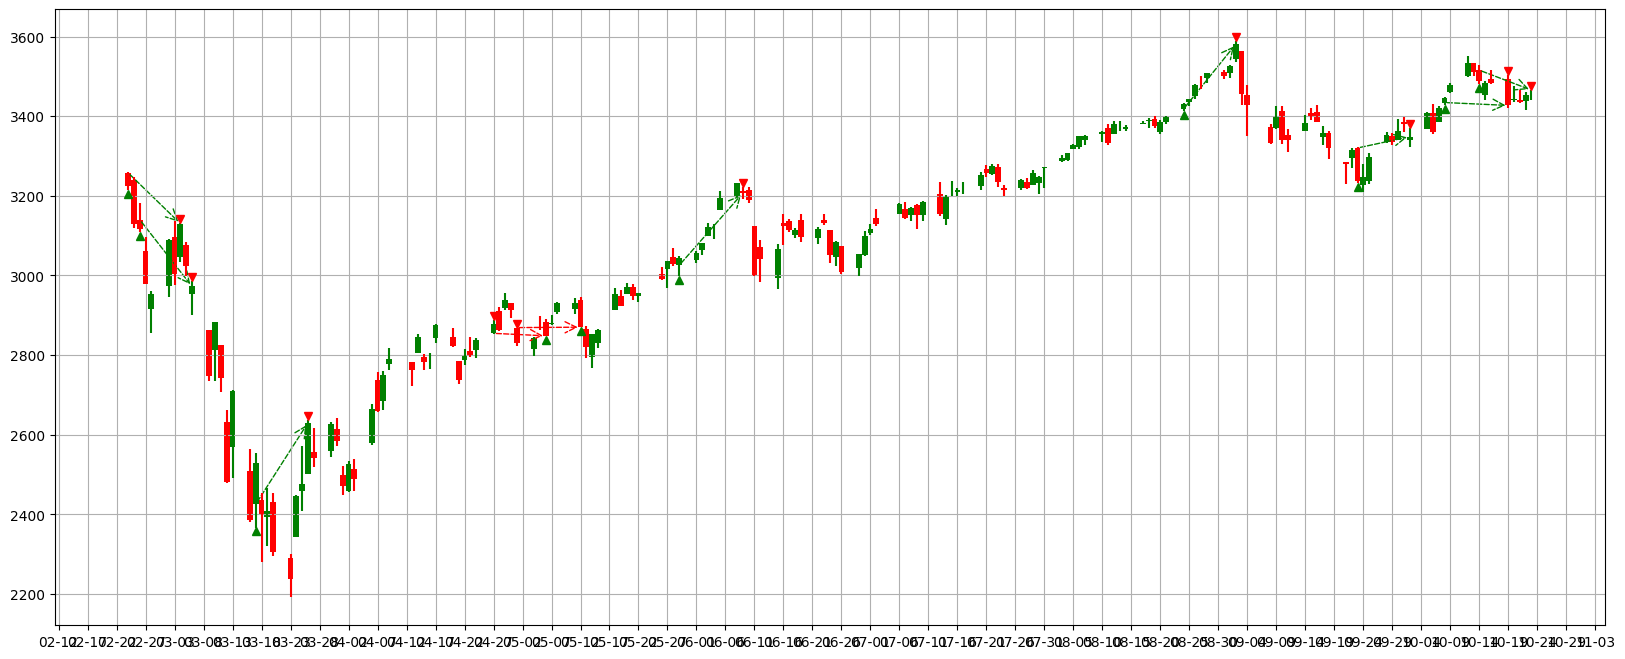

In [29]:
evaluater.draw_profit_plot(profit_table, all_data)

In [30]:
total_profit, profit_table = evaluater.build_profit_table_strategy_2(result_table, all_data, profit_percentage, loss_percentage, pv_range)
print('total_profit =', total_profit)
with pd.option_context('display.max_rows', None,
                    'display.max_columns', None,
                    'display.precision', 3,
                    ):
    display(profit_table)

total_profit = -385.0240039062501


,in_date,in_price,out_date,out_price,pv,profit,strategy,strategy_price,profitability
0,2020-02-24,3257.61,2020-02-27,2997.001,valley,-260.609,stop_loss,2997.001,-0.08 %
1,2020-02-26,3139.9,2020-02-28,2888.708,valley,-251.192,stop_loss,2888.708,-0.08 %
2,2020-03-17,2425.66,2020-03-23,2231.607,valley,-194.053,stop_loss,2231.607,-0.08 %
3,2020-04-27,2854.65,2020-05-06,2848.42,peak,6.23,NaN,NaN,0.0022 %
4,2020-05-01,2869.09,2020-05-12,2870.12,peak,-1.03,NaN,NaN,-0.0004 %
5,2020-05-29,3025.17,2020-06-09,3207.18,valley,182.01,NaN,NaN,0.0602 %
6,2020-09-23,3320.11,2020-10-02,3348.42,valley,28.31,NaN,NaN,0.0085 %
7,2020-08-24,3418.09,2020-09-02,3580.84,valley,162.75,NaN,NaN,0.0476 %
8,2020-10-08,3434.28,2020-10-19,3426.92,valley,-7.36,NaN,NaN,-0.0021 %
9,2020-10-14,3515.47,2020-10-23,3465.39,valley,-50.08,NaN,NaN,-0.0142 %


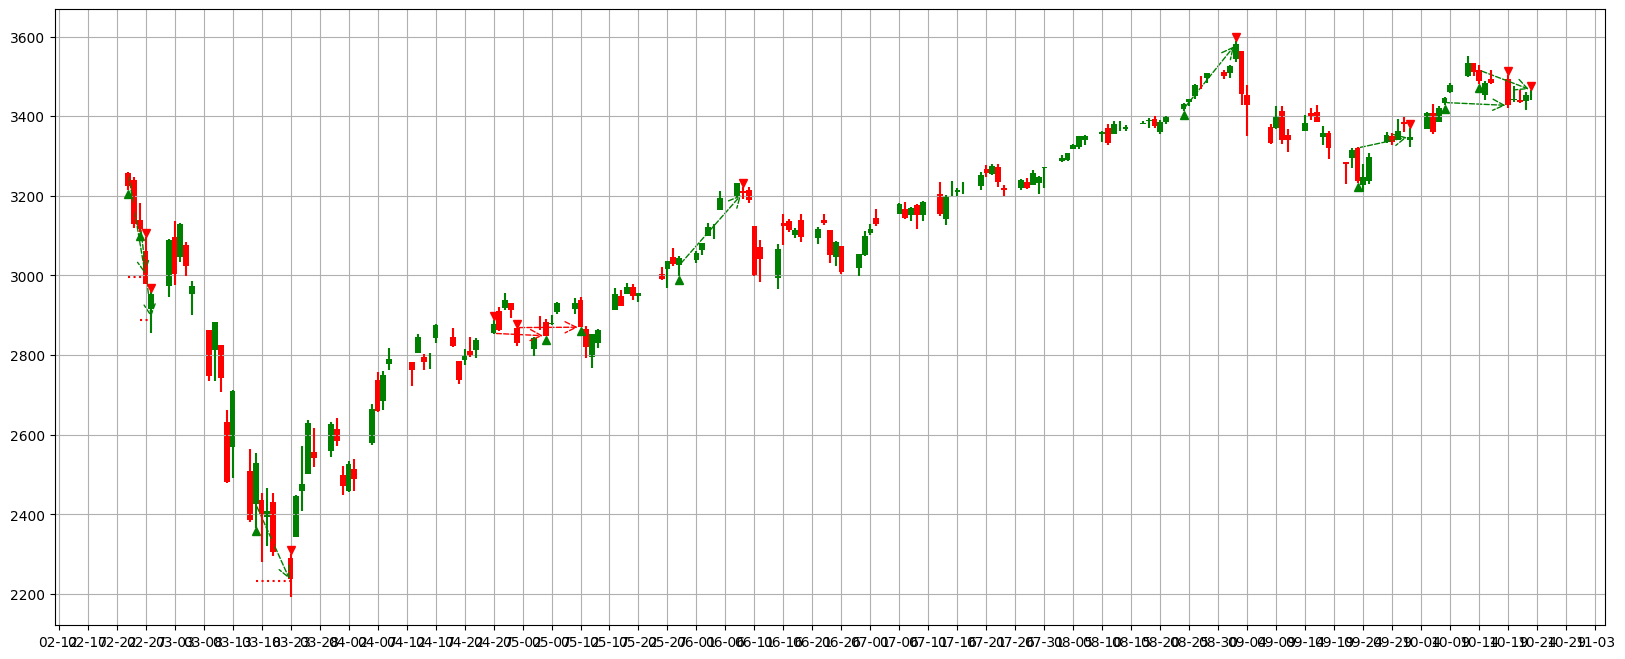

In [31]:
evaluater.draw_profit_plot(profit_table, all_data)

In [32]:
total_profit, profit_table = evaluater.build_profit_table_strategy_3(result_table, all_data, profit_percentage, loss_percentage, pv_range)
print('total_profit =', total_profit)
with pd.option_context('display.max_rows', None,
                    'display.max_columns', None,
                    'display.precision', 3,
                    ):
    display(profit_table)

total_profit = -72.99535156249976


,in_date,in_price,out_date,out_price,pv,profit,strategy,strategy_price,profitability
0,2020-02-24,3257.61,2020-03-04,3130.12,valley,-127.49,NaN,NaN,-0.0391 %
1,2020-02-26,3139.9,2020-03-06,2972.37,valley,-167.53,NaN,NaN,-0.0534 %
2,2020-03-17,2425.66,2020-03-18,2326.855,valley,-98.805,stop_loss,2326.855,-0.0407 %
3,2020-04-27,2854.65,2020-05-06,2848.42,peak,6.23,NaN,NaN,0.0022 %
4,2020-05-01,2869.09,2020-05-12,2870.12,peak,-1.03,NaN,NaN,-0.0004 %
5,2020-05-29,3025.17,2020-06-09,3207.18,valley,182.01,NaN,NaN,0.0602 %
6,2020-09-23,3320.11,2020-10-02,3348.42,valley,28.31,NaN,NaN,0.0085 %
7,2020-08-24,3418.09,2020-09-02,3580.84,valley,162.75,NaN,NaN,0.0476 %
8,2020-10-08,3434.28,2020-10-19,3426.92,valley,-7.36,NaN,NaN,-0.0021 %
9,2020-10-14,3515.47,2020-10-23,3465.39,valley,-50.08,NaN,NaN,-0.0142 %


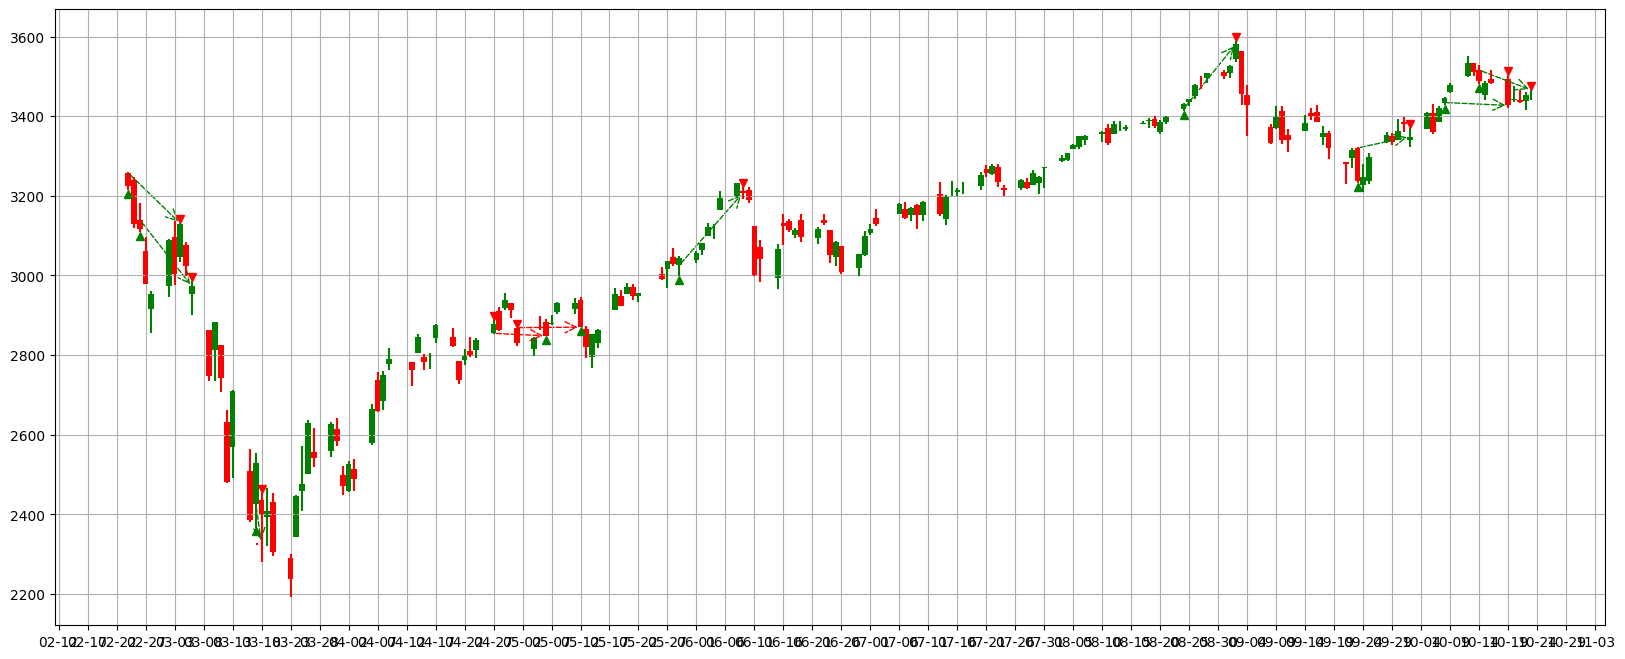

In [33]:
evaluater.draw_profit_plot(profit_table, all_data)

In [52]:
best_fit_harm[3]

43.0

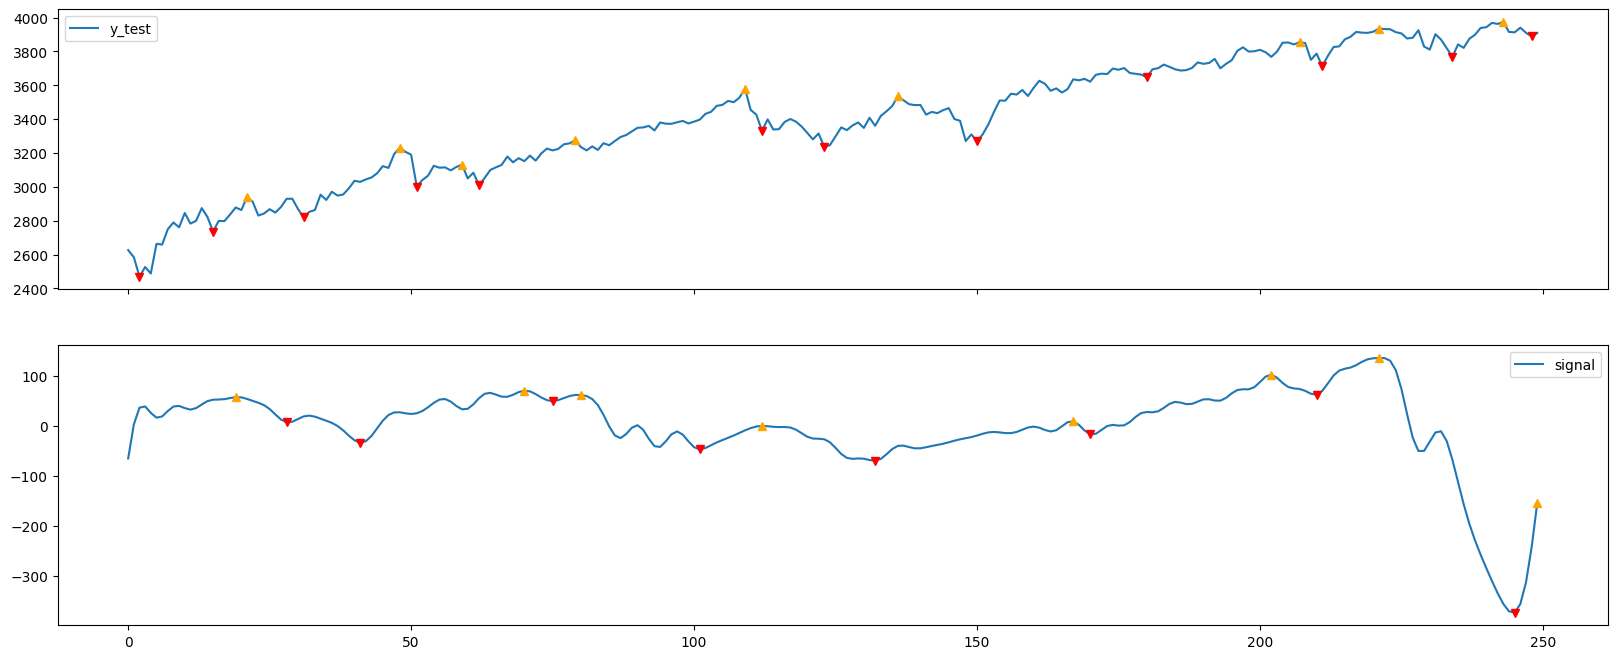

In [59]:
fig, ax = plt.subplots(2, 1, figsize=(20, 8), sharex=True)
ax[0].plot(test_data[3].flatten(), label='y_test')
ax[1].plot(processed_signal[3].flatten(), label='signal')
for x , pv in enumerate(pv_test_data[3]):
    if pv == 1:
        ax[0].plot(x, test_data[3].flatten()[x], '^', color='orange')
    elif pv == -1:
        ax[0].plot(x, test_data[3].flatten()[x], 'v', color='red')
for x , pv in enumerate(pv_signal[3]):
    if pv == 1:
        ax[1].plot(x, processed_signal[3].flatten()[x], '^', color='orange')
    elif pv == -1:
        ax[1].plot(x, processed_signal[3].flatten()[x], 'v', color='red')
ax[0].legend()
ax[1].legend()
plt.show()

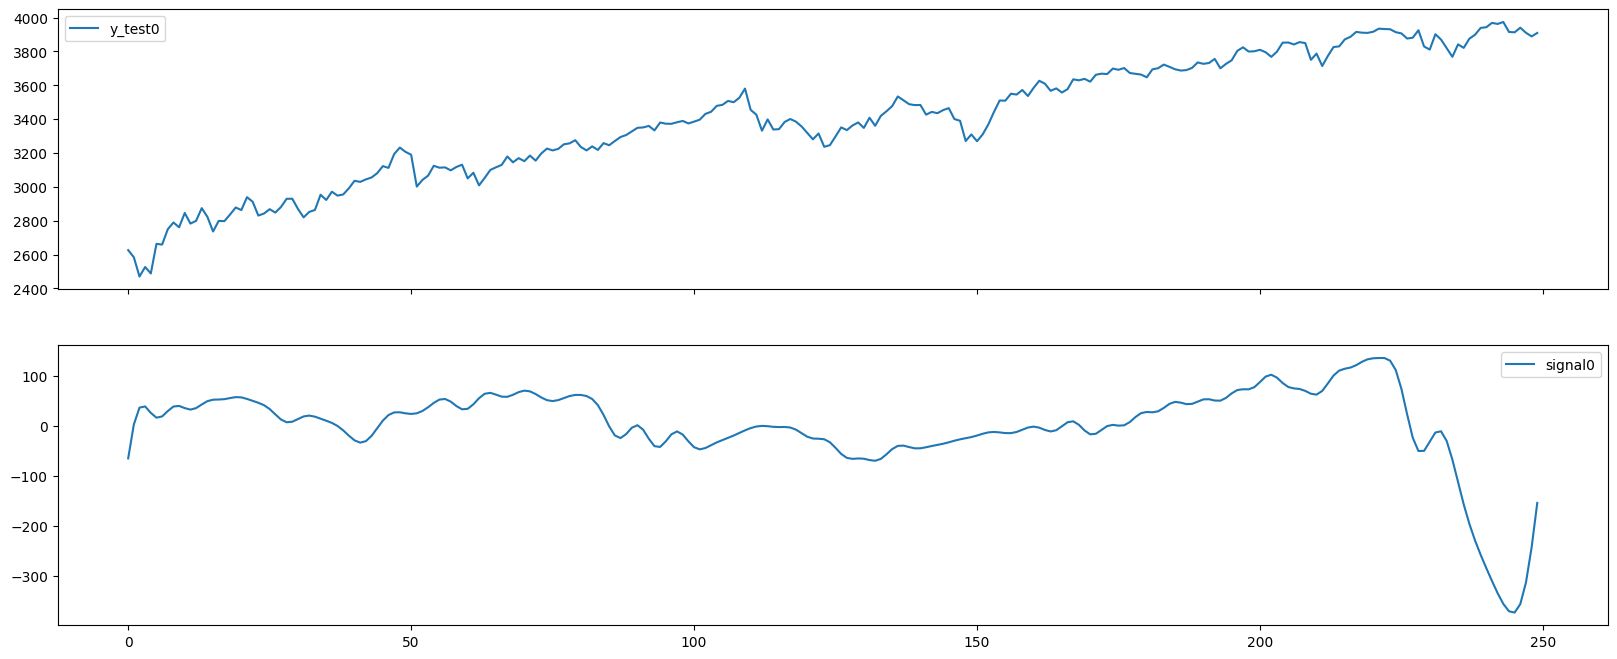

In [60]:
fig, ax = plt.subplots(2, 1, figsize=(20, 8), sharex=True)
count=0
for i in range(0, 1): 
    countx=range(count, count+250)
    ax[0].plot(countx, test_data[3], label=f'y_test{i}')
    ax[1].plot(countx, processed_signal[3], label=f'signal{i}')
    count+=10
ax[0].legend()
ax[1].legend()
plt.show()